### Integration using Metropolis algorithm
- $f(x) = \int_1^5 (x^2 + x) e^{-x} dx$. The analytic solution is $\int_1^5 f(x) dx = \dfrac{7e^4 - 43}{e^5}$.
- The normalized probability distributions are $p_a(x) = C_a,\ p_b(x) = C_b e^{-x}$ and $p_c(x) = C_c f(x)$, where $C_a = \dfrac{1}{4},\ C_b = (e^{-1} - e^{-5})^{-1}$ and $C_c = \dfrac{e^5}{7e^4 - 43}$ are the normalization constants.
- $p_c$ always gives the exact solution becuase $\dfrac{f(x)}{p_c(x)} = C_c$, where $C_c = \int_1^5 f(x) dx$ is the normalization constant. However, for functions whose integral we are trying to solve numerically, the normalization constant cannot be obtained and hence the original function cannot be used as the probability distribution.
- The acceptance rate for $p_a(x)$ is always $100\%$, since $\dfrac{p_a(x_{trial})}{p_a(x_{i-1})} = \dfrac{C_a}{C_a} = 1$, and so there is no importance sampling. The solution is always exact for $p_c(x)$, so it is independent of acceptance rate (exception for zero acceptance). Hence the acceptance rate is only relevent for $p_b(x)$, for which it was in the range $40-60\%$. It could not be reduced further as the maximum step size $\delta \leq 4$ for the given interval $[1, 5]$. This non-ideal acceptance rate and (as seen by plotting f(x) and p(x) on geogebra) the relatively higher deviation of $p_b(x)$ than $p_a(x)$ from $f(x)$ supports the poor convergence of $p_b(x)$ seen below.

### part (a)
- Note: histogram and acceptance rates are not displayed on default.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# parameters
dx = 0.1                                # histogram interval
a, b = 1, 5                             # integration interval
no_of_bins = int((b - a) / dx)          # no. of bins for histogram

F0 = (7 * np.exp(4) - 43) / np.exp(5)   # analytic solution

# function to integrate
def f(x):
    return (x**2 + x) * np.exp(-x)

# normalization constants
C_a = 1/4
C_b = 1 / (1 / np.exp(1) - 1 / np.exp(5))
C_c = 1 / F0

#normalized probability distributions
def p_a(x):
    return 0 if x < 0 else C_a

def p_b(x):
    return 0 if x < 0 else C_b * np.exp(-x)

def p_c(x):
    return 0 if x < 0 else C_c * f(x)

# Metropolis algorithm
def metropolis(p, dx_max, n, hist=0, accept=0):
    rnd.seed()
    F_sum = 0
    rejected = 0

    x_arr = np.zeros(n)
    x_arr[0] = rnd.uniform(a, b)        # starting point
    F_sum += f(x_arr[0]) / p(x_arr[0])
    
    for i in range(1, n):
        x_min = x_arr[i-1] - dx_max     # restricting x_trial to [a, b]
        x_max = x_arr[i-1] + dx_max
        
        if x_min < a: x_min = a
        if x_max > b: x_max = b
            
        x_trial = rnd.uniform(x_min, x_max)
        w = p(x_trial) / p(x_arr[i-1])
        
        if w >= 1:
            x_arr[i] = x_trial
        else:
            r = rnd.random()
            if r <= w: 
                x_arr[i] = x_trial
            else:
                x_arr[i] = x_arr[i-1]
                rejected += 1
            
        F_sum += f(x_arr[i]) / p(x_arr[i])

    # histogram
    if hist != 0:
        plt.hist(x_arr, bins=no_of_bins)
        plt.title('distribution of x')
        plt.show()
        
    if accept != 0 and p == p_b: print('{} \t {:.0f}'.format(n, (1 - rejected / n) * 100))
        
    return F_sum / n

### part (b)
- Note: $p_c(x)$ gives exact solution, so all the lines converge to the analytical solution on the plot.

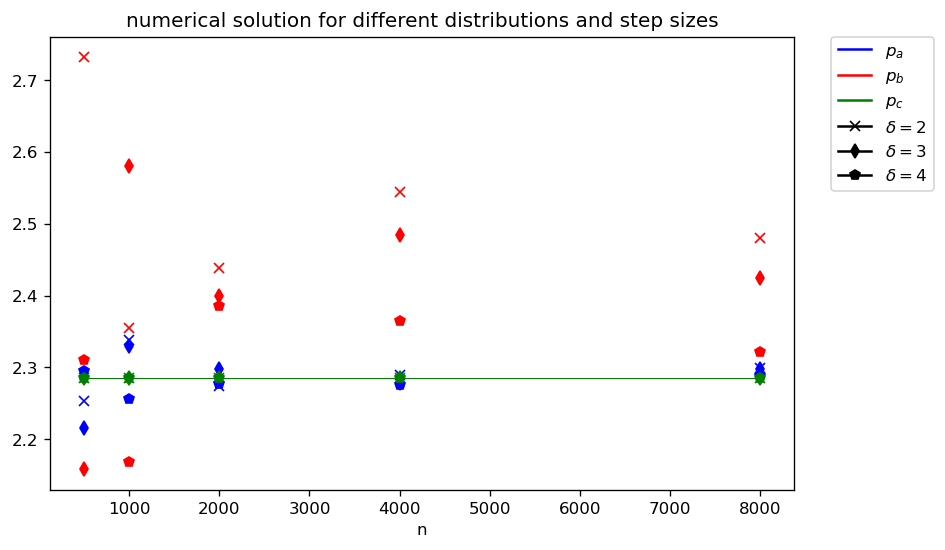

In [103]:
n_arr = [500, 1000, 2000, 4000, 8000]
N = len(n_arr)

steps = [2, 3, 4]                           # maximum step sizes
N_steps = len(steps)

# solutions for p_a, p_b, p_c; each row for a maximum step size
A = np.zeros((N_steps, N))
B = np.zeros((N_steps, N))
C = np.zeros((N_steps, N))

for i in range(N_steps):
    for j in range(N):
        A[i][j] = metropolis(p_a, steps[i], n_arr[j])
        B[i][j] = metropolis(p_b, steps[i], n_arr[j])
        C[i][j] = metropolis(p_c, steps[i], n_arr[j])

# plot
plt.figure(figsize=(8, 5), dpi=120)
colors = ['b', 'r', 'g']
markers = ['x', 'd', 'p']
width = 0

for i in range(N_steps):
    plt.plot(n_arr, A[i], c=colors[0], marker=markers[i], lw=width)
    plt.plot(n_arr, B[i], c=colors[1], marker=markers[i], lw=width)
    plt.plot(n_arr, C[i], c=colors[2], marker=markers[i], lw=0.5)

handles = ([plt.Line2D([], [], color=col) for col in colors]
            + [mlines.Line2D([], [], color='k', marker=mark) for mark in markers])
labels = ['$p_a$', '$p_b$', '$p_c$'] + ['$\delta = {}$'.format(max_step) for max_step in steps]

plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('numerical solution for different distributions and step sizes')
plt.xlabel('n')
plt.show()